## Fraud Detection on Bank Payments (using BankSim dataset)

In [ ]:
# Objective: Using ML tool to detect the fraudulent transactions
# dataset: https://www.kaggle.com/ntnu-testimon/banksim1

## WORKFLOW

In [23]:
## import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('payment01.csv')
print(df.shape)
print(df.info())

(594643, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB
None


In [25]:
df.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [26]:
# look at all of the values in each col. & get a count
for val in df:
    print(df[val].value_counts())
    print()

175    3774
177    3758
152    3746
178    3743
174    3743
       ... 
5      2525
3      2499
2      2462
0      2430
1      2424
Name: step, Length: 180, dtype: int64

'C1978250683'    265
'C1275518867'    252
'C806399525'     237
'C515668508'     205
'C1338396147'    195
                ... 
'C1345586046'      6
'C1156745710'      6
'C1743702978'      5
'C1404665203'      5
'C1809646275'      5
Name: customer, Length: 4112, dtype: int64

'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64

'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: gender, dtype: int64

'28007'    594643
Name: zipcodeOri, dtype: int64

'M1823072687'    299693
'M348934600'     205426
'M85975013'       26254
'M1053599405'      6821
'M151143676'       6373
'M855959430'       6098
'M1946091778'      5343
'M1913465890'      3988
'M209847108'       3814
'M480139044'       3508
'M349281107'       2881
'M1600850729'      

In [27]:
## EDA 1: Age group vs Fraud
f0 = df.loc[df['fraud']==0]
f1 = df.loc[df['fraud']==1]
age_f0 = f0.groupby(['age']).agg({'fraud':'count'})
age_f0_1 = age_f0.reset_index()
age_f0_2 = age_f0_1.rename(columns={'fraud':'no fraud'})
age_f1 = f1.groupby(['age']).agg({'fraud':'count'})
age_f1_2 = age_f1.reset_index()
pd.merge(age_f0_2, age_f1_2,how='left', on='age')

,age,no fraud,fraud
0,'0',2404,48
1,'1',57442,689
2,'2',184966,2344
3,'3',145376,1755
4,'4',107615,1410
5,'5',61956,686
6,'6',26513,261
7,'U',1171,7


In [ ]:
# Age: Categorized age
# 0: <= 18,
# 1: 19-25,
# 2: 26-35,
# 3: 36-45,
# 4: 46:55,
# 5: 56:65,
# 6: > 65
# U: Unknown

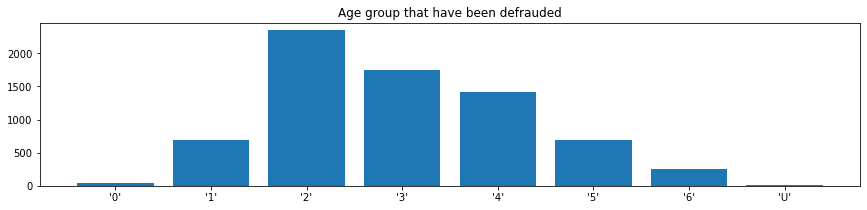

In [28]:
## EDA 1: Age group vs Fraud
plt.figure(figsize=(50, 3))
plt.subplot(131)
plt.bar(age_f1_2.age,age_f1_2.fraud)
plt.title('Age group that have been defrauded')
plt.show()

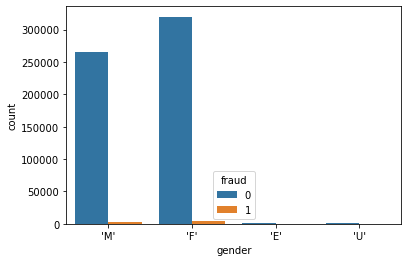

In [29]:
## EDA 2: Gender vs Fraud
# Gender: Gender for customer
# E : Enterprise,
# F: Female,
# M: Male,
# U: Unknown
sns.countplot(x="gender", hue="fraud", data=df)

In [30]:
## EDA 2: Gender vs Fraud
gender_fraud = df.groupby('gender').agg({"fraud":'sum'})
gender_fraud1 = gender_fraud.reset_index()
gender_fraud1['%%'] = (gender_fraud1['fraud']/(gender_fraud['fraud'].sum()))*100
# gender_fraud1
gender_fraud2 = gender_fraud1.sort_values('fraud',ascending=False)
gender_fraud2

,gender,fraud,%%
1,'F',4758,66.083333
2,'M',2435,33.819444
0,'E',7,0.097222
3,'U',0,0.000000


In [31]:
## EDA 3: Category vs Fraud
f0 = df.loc[df['fraud']==0]
f1 = df.loc[df['fraud']==1]
cat_f0 = f0.groupby(['category']).agg({'fraud':'count'})
cat_f0_1 = cat_f0.reset_index()
cat_f0_2 = cat_f0_1.rename(columns={'fraud':'no_fraud'})
cat_f1 = f1.groupby(['category']).agg({'fraud':'count'})
cat_f1_2 = cat_f1.reset_index()
cat_n_fraud = pd.merge(cat_f0_2, cat_f1_2,how='left', on='category')
cat_n_fraud['fraud_%%']=(cat_n_fraud['fraud'])/((cat_n_fraud['no_fraud'])+(cat_n_fraud['fraud']))*100
cat_n_fraud.sort_values('fraud',ascending=False)

,category,no_fraud,fraud,fraud_%%
10,'es_sportsandtoys',2020,1982.0,49.525237
4,'es_health',14437,1696.0,10.512614
14,'es_wellnessandbeauty',14368,718.0,4.759380
13,'es_travel',150,578.0,79.395604
6,'es_hotelservices',1196,548.0,31.422018
8,'es_leisure',25,474.0,94.989980
5,'es_home',1684,302.0,15.206445
7,'es_hyper',5818,280.0,4.591669
9,'es_otherservices',684,228.0,25.000000
11,'es_tech',2212,158.0,6.666667


In [32]:
## EDA 4: Table (Fraud vs No Fraud) on amount with percent 
f0 = df.loc[df['fraud']==0]
f1 = df.loc[df['fraud']==1]
cat_amo_f0 = f0.groupby(['category']).agg({'amount':'mean'})
cat_amo_f0_1 = cat_amo_f0.reset_index()
cat_amo_f0_2 = cat_amo_f0_1.rename(columns={'amount':'no_fraud_ave_amount'})
cat_amo_f1 = f1.groupby(['category']).agg({'amount':'mean'})
cat_amo_f1_1 = cat_amo_f1.reset_index()
cat_amo_f1_2 = cat_amo_f1_1.rename(columns={'amount':'fraud_ave_amount'})
fraud_ = df.groupby(['category']).agg({'fraud':'mean'})
fraud_1 = fraud_.reset_index()
fraud_2 = fraud_1.rename(columns={'fraud':'%%'})
cat_amo_ = pd.merge(cat_amo_f0_2, cat_amo_f1_2,how='left', on='category')
cat_amo_fraud = pd.merge(cat_amo_, fraud_2,how='left', on='category')
cat_amo_fraud.sort_values('fraud_ave_amount',ascending=False)

,category,no_fraud_ave_amount,fraud_ave_amount,%%
13,'es_travel',669.025533,2660.802872,0.793956
5,'es_home',113.338409,457.484834,0.152064
6,'es_hotelservices',106.548545,421.823339,0.314220
11,'es_tech',99.924638,415.274114,0.066667
4,'es_health',103.737228,407.031338,0.105126
10,'es_sportsandtoys',88.502738,345.366811,0.495252
9,'es_otherservices',75.685497,316.469605,0.250000
8,'es_leisure',73.230400,300.286878,0.949900
2,'es_fashion',62.347674,247.008190,0.017973
14,'es_wellnessandbeauty',57.320219,229.422535,0.047594


In [35]:
## Data Feature Engineering - fillna, drop cols / row, select useful features
cols = ['age','gender','merchant','category','amount']
X = df[cols]
y = df['fraud']
print(X.shape)
print(y.shape)

(594643, 5)
(594643,)


In [36]:
## get_dummies for categorical data 
x = pd.get_dummies(X,columns=['age','gender','merchant','category'])

In [40]:
## for inbalancing dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)

In [43]:
## Train test split
from sklearn.model_selection import train_test_split
XX_train, XX_test, YY_train, YY_test = train_test_split(x_res, y_res, test_size=0.3, random_state=42)

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [15]:
## Train Model
from sklearn.svm import SVC
svc_lin = SVC(kernel='linear',random_state=0)
svc_lin.fit(XX_train, YY_train)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(XX_train, YY_train)

print('SVC Linear Training Accuracy: ', svc_lin.score(XX_train, YY_train))
print('K Neighbors Training Accuracy: ', knn.score(XX_train, YY_train))

SVC Linear Training Accuracy:  0.9955507507507507
K Neighbors Training Accuracy:  0.9955363363363363


In [17]:
## Prediction
y_pred_svc = svc_lin.predict(XX_test)
y_pred_knn = knn.predict(XX_test)

In [18]:
## Model performance Evaluation
 
class_report_svc = classification_report(YY_test, y_pred_svc)
class_report_knn = classification_report(YY_test, y_pred_knn)

print(class_report_svc)
print()
print(class_report_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    176277
           1       0.90      0.74      0.81      2116

    accuracy                           1.00    178393
   macro avg       0.95      0.87      0.90    178393
weighted avg       1.00      1.00      1.00    178393


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    176277
           1       0.87      0.66      0.75      2116

    accuracy                           0.99    178393
   macro avg       0.93      0.83      0.87    178393
weighted avg       0.99      0.99      0.99    178393



In [45]:
import xgboost as xgb
dtrain = xgb.DMatrix(XX_train,label=YY_train)
dtest = xgb.DMatrix(XX_test,label=YY_test)
param = {'max_depth':10,'eta':0.3,'gamma':0.2,'objective':'multi:softmax','num_class':2}
bst = xgb.train(param,dtrain)
y_pred_xgb = bst.predict(dtest)
accu_xgb = accuracy_score(YY_test,y_pred_xgb)
print("Accuracy : ", accu_xgb)

Accuracy :  0.9917552331288692


## Conclusion

In [ ]:
# In this demo, we have used 3 models: SVC linear, KNN and xgboost to do fraud detection on the bank payment.
# Each model showed a quite high accuracy representatively so turning their hyperparameters are not required.
# As a result, using machine learning models would be definitely able to help fraud detection and reduce company's risk in many industries such as fin-tech, e-commerce, banking, healthcare and so on.

In [ ]:
# Any business insights or follow up actions ?
# 1. Further investigate on those accounts that highly fraud fraudulent.
# 2. Provide and promote other more secure methods to the customers for fraud prevention.
# 3. Develop multi-steps verification / authentication for the company if the number of fraud case is extremely high.